Praca domowa numer dwa związana z obliczeniam greeks dla opcji azjatyckiej. Cały kod, ze wszystkimi potrzebnymi (i mniej potrzebnymi) funkcjami znajduje się u mnie na Githubie: https://github.com/LipaFNTE/FinMath

In [1]:
import os, sys,  warnings

current_path = os.path.abspath('.')
parent_path = os.path.dirname(current_path)

sys.path.append(parent_path)
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'child.settings')

from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [2]:
import pandas as pd
import numpy as np
from OptionPricing import Greeks
from OptionPricing.BlackScholes import BS
from OptionPricing import Payoff, Instrument, utils

import matplotlib.pyplot as plt

Parametry: $\mu, \sigma$, r, q, $S_0$, K, T, call

In [3]:
mu = 0
sigma = 0.2
r = 0.05
q = 0
S_0 = 100
K = 100
T = [i/12 for i in range(1, 13)]
call = True
n_min = 1000
n_max = 1000000
step = 20000

Teraz zdefiniujemy instrument zgodnie z modelem Blacka-Scholesa

In [4]:
instrument = BS(mu, sigma, r, q, S_0, K, T, call)

### Greki metodą różniczkowania po trajektoriach

Obliczamy greki w zależności od parametru n. Na początek metoda "Trajectory Differentiation". Metoda calculate_greeks bierze listę grek do obliczenia i wyrzuca słownik z wartościami estymatora oraz RMSE

In [5]:
greeks = {}
for k in range(n_min, n_max, step):
    g = Greeks.Greeks(instrument, Payoff.Asian(instrument, True), utils.GreekMethod.TRAJECTORY_DIFFERENTIATION, k)
    greeks[k] = g.calculate_greeks(['delta', 'vega'])

Wyciągamy delty oraz vegi

In [6]:
delta, vega = {}, {}
for k, v in greeks.items():
    delta[k] = greeks[k]['delta']
    vega[k] = greeks[k]['vega']

Rysujemy wykres estymatora oraz wykres RMSE dla poszczególnych grek

Text(0, 0.5, 'Delta')

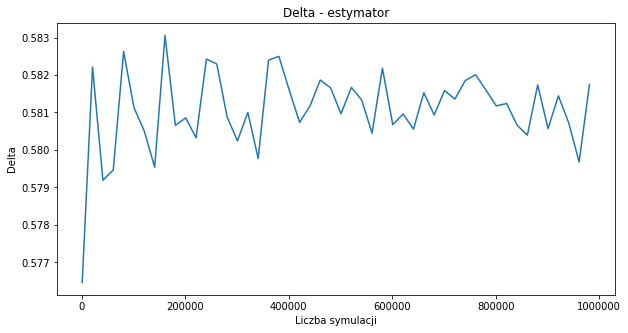

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(list(delta.keys()), [i[0] for i in delta.values()])
plt.title('Delta - estymator')
plt.xlabel('Liczba symulacji')
plt.ylabel('Delta')

Text(0, 0.5, 'Delta')

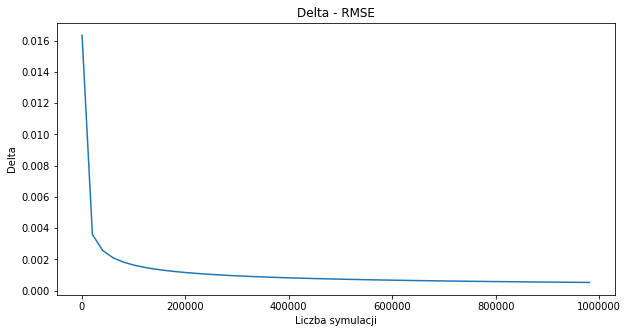

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(list(delta.keys()), [i[1] for i in delta.values()])
plt.title('Delta - RMSE')
plt.xlabel('Liczba symulacji')
plt.ylabel('Delta')

Text(0, 0.5, 'Vega')

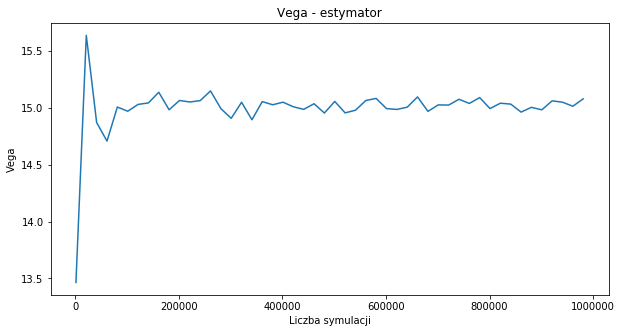

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(list(vega.keys()), [i[0] for i in vega.values()])
plt.title('Vega - estymator')
plt.xlabel('Liczba symulacji')
plt.ylabel('Vega')

Text(0, 0.5, 'Vega')

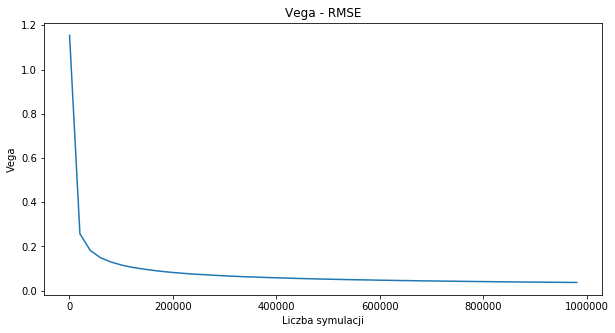

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(list(vega.keys()), [i[1] for i in vega.values()])
plt.title('Vega - RMSE')
plt.xlabel('Liczba symulacji')
plt.ylabel('Vega')

## Wnioski

Przy początkowych wartościach n widoczna jest mocna zmienność w estymatorze zarówno vegi jak i delty. Po zwiększeniu liczby iteracji delta i vega fluktuują w wyraźnie wyznaczonym obszarze. RMSE w obu przypadkach bardzo płynnie spada, po kilkudziesięciu tysiącach iteracji widać znaczne zmniejszenie zmian RMSE.

### Greki metodą ilorazu wiarygodności

Robimy to samo dla metody ilorazu wiarygodności

In [11]:
greeks_lr = {}
for k in range(n_min, n_max, step):
    g = Greeks.Greeks(instrument, Payoff.Asian(instrument, True), utils.GreekMethod.LIKELIHOOD_RATIO, k)
    greeks_lr[k] = g.calculate_greeks(['delta', 'vega'])

In [12]:
delta_lr, vega_lr = {}, {}
for k, v in greeks_lr.items():
    delta_lr[k] = greeks_lr[k]['delta']
    vega_lr[k] = greeks_lr[k]['vega']

Text(0, 0.5, 'Delta')

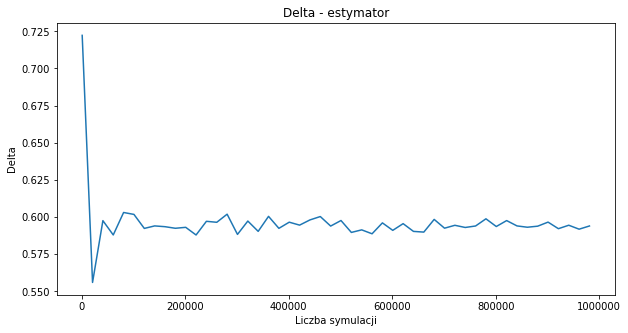

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(list(delta_lr.keys()), [i[0] for i in delta_lr.values()])
plt.title('Delta - estymator')
plt.xlabel('Liczba symulacji')
plt.ylabel('Delta')

Text(0, 0.5, 'RMSE')

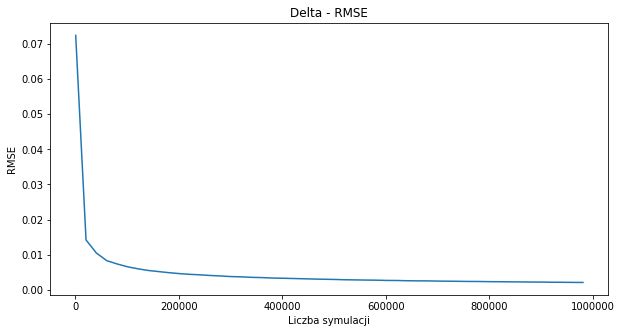

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(list(delta_lr.keys()), [i[1] for i in delta_lr.values()])
plt.title('Delta - RMSE')
plt.xlabel('Liczba symulacji')
plt.ylabel('RMSE')

Text(0, 0.5, 'Vega')

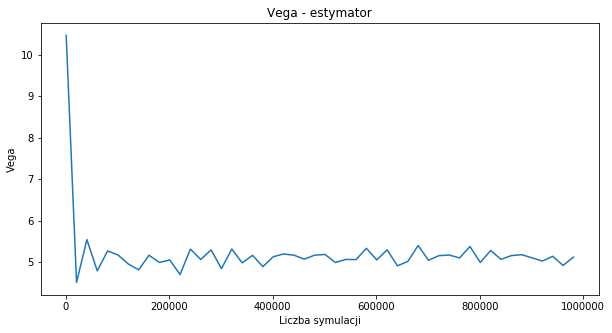

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(list(vega_lr.keys()), [i[0] for i in vega_lr.values()])
plt.title('Vega - estymator')
plt.xlabel('Liczba symulacji')
plt.ylabel('Vega')

Text(0, 0.5, 'Vega')

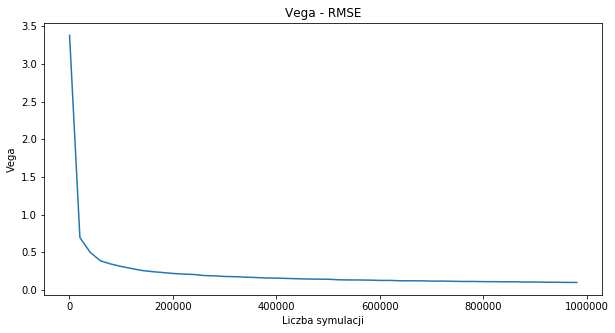

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(list(vega_lr.keys()), [i[1] for i in vega_lr.values()])
plt.title('Vega - RMSE')
plt.xlabel('Liczba symulacji')
plt.ylabel('Vega')

Podobna zależność co w przypadku różniczkowania po trajektoriach, niemniej dziwnie wygląda znacząca różnica w estymatorze vegi, ponad trzykrotnie większa vega w przypadku ilorazu wiarygodności. Może to świadczyć o błędzie w implementacji, chociaż sam wykres pokazuje znaczącą stabilizację estymatora po kilkudziesięciu tysiącach iteracji.